<img src="images/Peoplelogy-Logo.png" style="height: 100px;" align=left> <img src="images/sklearn-logo.png" style="height: 100px;" align=right>

# Clustering Project 1: Mall Customer Segmentation Part 2

---

<img src="images/mall.jpg" style="height: 500px; width: 1500px;" align=left>
<br>

---

## Objective
Segment customers of a mall into distinct groups based on their annual income and spending behavior to help the mall design targeted marketing strategies.

---

## Dataset
- **Mall Customer Dataset**:
  - **Columns**:
    - `CustomerID`: Unique ID for each customer.
    - `Gender`: Male or Female.
    - `Age`: Age of the customer.
    - `Annual Income (k$)`: Annual income in thousands of dollars.
    - `Spending Score (1-100)`: A score assigned based on customer spending habits.

---



In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import davies_bouldin_score



## Tasks

### 1. Data Exploration
- Load the dataset and display the first few rows.
- Visualize the distribution of `Age`, `Annual Income`, and `Spending Score`.

---


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


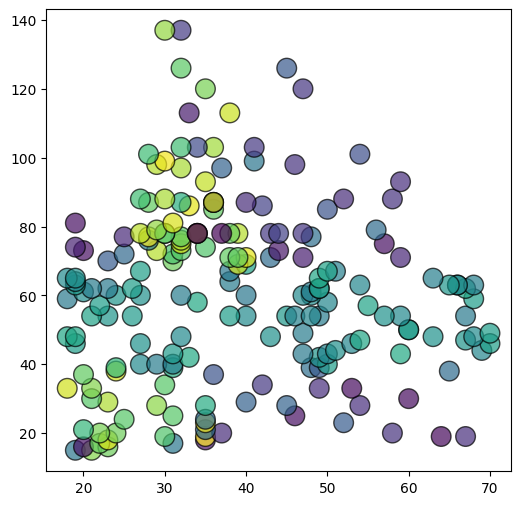

In [3]:
x = df.Age
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

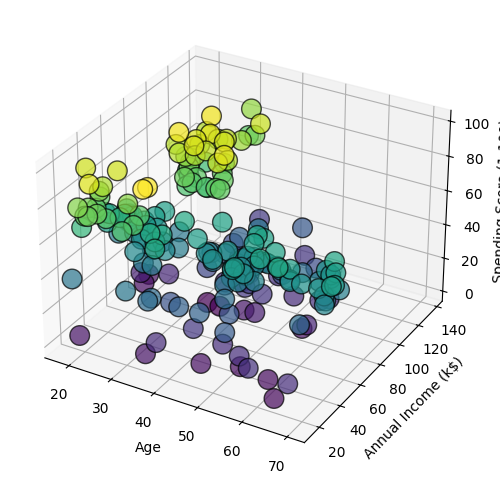

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = df.Age
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


### 2. Preprocessing
- Select `Annual Income` and `Spending Score` as features.
- Standardize the features using `StandardScaler`.

---


In [5]:
#the feature:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
#Standardize the features:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


### 3. Clustering
#### **K-Means:**
1. Use the **Elbow Method** to determine the optimal number of clusters.
   - Plot the Within-Cluster-Sum of Squares (WCSS) for different \( K \) values and find the "elbow point."
2. Use the **Silhouette Method** to validate the number of clusters.
   - Compute the silhouette score for each value of \( K \) and plot the scores.
3. Apply K-Means clustering and visualize the clusters.


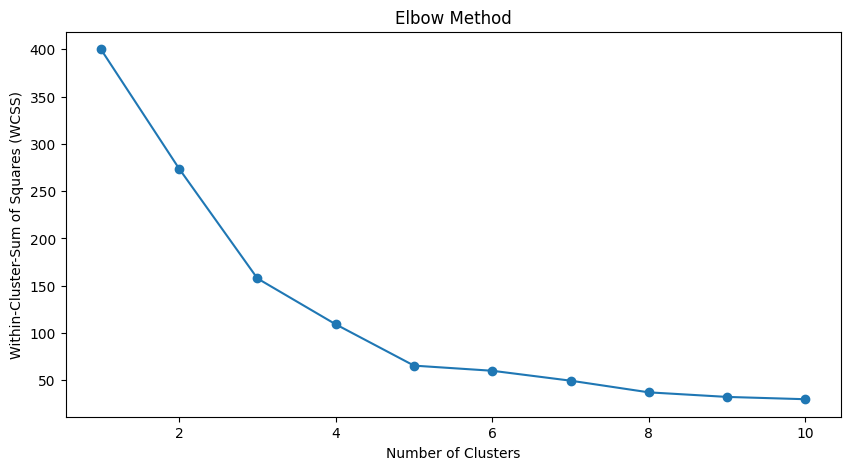

In [6]:
#Elbow method:
from sklearn.cluster import KMeans
# Compute WCSS for different values of K
wcss = []
K_range = range(1, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # WCSS

# Plot the WCSS to find the "elbow"
plt.figure(figsize=(10, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum of Squares (WCSS)')
plt.show()

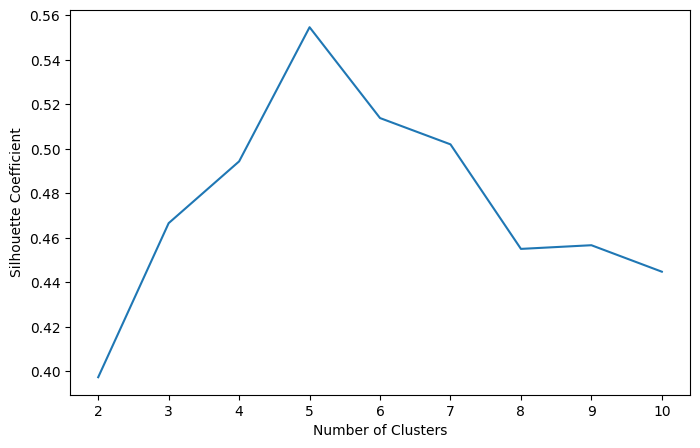

In [7]:
#Silhouette Method:

from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, random_state=42)
     kmeans.fit(scaled_features)
     score = silhouette_score(scaled_features, kmeans.labels_)
     silhouette_coefficients.append(score)


plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [8]:
#k-mean clustering method:

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(scaled_features)

# inertia on the fitted data
kmeans.inertia_

65.56840815571681

Text(0, 0.5, 'Inertia')

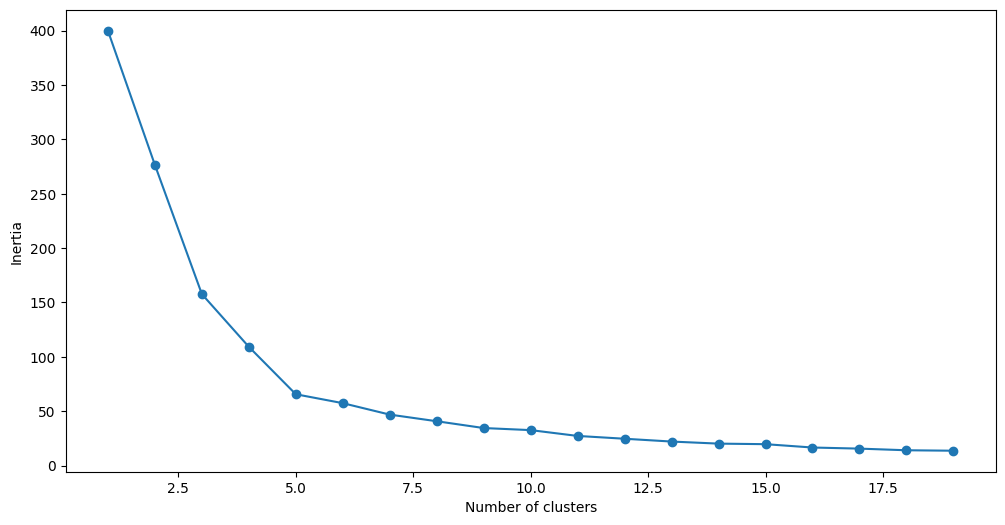

In [9]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


#### **DBSCAN:**
1. Apply DBSCAN clustering and visualize the clusters.
2. Experiment with different values of \( \varepsilon \) and `MinPts` to observe their effects.



In [10]:
#Apply DBSCAN clustering and visualize the clusters.
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [11]:
DBSCAN_dataset.Cluster.value_counts().to_frame()


,count
Cluster,
0,112
2,34
3,24
-1,18
1,8
4,4


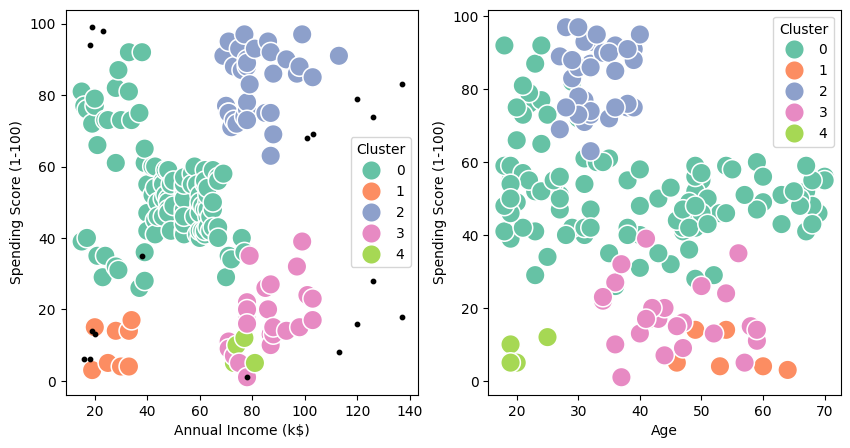

In [12]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster'] == -1]

fig2, axes = plt.subplots(1, 2, figsize=(10, 5))


x = 'Age',
y = 'Annual Income (k$)',
z = 'Spending Score (1-100)',

# Correct scatterplot usage with x and y
sns.scatterplot( x='Annual Income (k$)', y='Spending Score (1-100)', data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200 )

sns.scatterplot(x='Age',y='Spending Score (1-100)', data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
    hue='Cluster',
    palette='Set2',
    ax=axes[1],
    legend='full',
    s=200
)

# Add outliers to the first subplot
axes[0].scatter(
    outliers['Annual Income (k$)'],
    outliers['Spending Score (1-100)'],
    s=10,
    label='outliers',
    c="k"
)


plt.show()


In [13]:
from sklearn.cluster import DBSCAN


x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Select multiple features

for ms in [3, 4, 5]:
    for e in [1, 1.5, 2, 3]:
        dbscan = DBSCAN(min_samples=ms, eps=e)
        clusters = dbscan.fit_predict(x)
        
        print(f"min_samples: {ms}, eps: {e}, clusters: {set(clusters)}")


min_samples: 3, eps: 1, clusters: {-1}
min_samples: 3, eps: 1.5, clusters: {-1}
min_samples: 3, eps: 2, clusters: {-1}
min_samples: 3, eps: 3, clusters: {0, 1, 2, -1}
min_samples: 4, eps: 1, clusters: {-1}
min_samples: 4, eps: 1.5, clusters: {-1}
min_samples: 4, eps: 2, clusters: {-1}
min_samples: 4, eps: 3, clusters: {-1}
min_samples: 5, eps: 1, clusters: {-1}
min_samples: 5, eps: 1.5, clusters: {-1}
min_samples: 5, eps: 2, clusters: {-1}
min_samples: 5, eps: 3, clusters: {-1}


In [14]:
x = df['Age'].values.reshape(-1, 1)

for ms in [3, 4, 5]:
    for e in [1, 1.5, 2, 3]:
        dbscan = DBSCAN(min_samples=ms, eps=e)
        clusters = dbscan.fit_predict(x)
        
        print(f"min_samples: {ms}, eps: {e}, clusters: {set(clusters)}")


min_samples: 3, eps: 1, clusters: {0, 1}
min_samples: 3, eps: 1.5, clusters: {0, 1}
min_samples: 3, eps: 2, clusters: {0, 1}
min_samples: 3, eps: 3, clusters: {0}
min_samples: 4, eps: 1, clusters: {0, 1}
min_samples: 4, eps: 1.5, clusters: {0, 1}
min_samples: 4, eps: 2, clusters: {0, 1}
min_samples: 4, eps: 3, clusters: {0}
min_samples: 5, eps: 1, clusters: {0, 1, 2}
min_samples: 5, eps: 1.5, clusters: {0, 1, 2}
min_samples: 5, eps: 2, clusters: {0, 1}
min_samples: 5, eps: 3, clusters: {0}


#### **Davies-Bouldin Index:**
1. Calculate the Davies-Bouldin Index for the chosen clustering.
2. Discuss which clustering approach (K-Means or DBSCAN) performs better based on the index.

---

In [15]:

scaler = StandardScaler()
data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans_labels = kmeans.fit_predict(data)

# Evaluate K-Means
kmeans_dbi = davies_bouldin_score(data, kmeans_labels)
print("K-Means DBI:", kmeans_dbi)


# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(data)

dbscan_core_data = data[dbscan_labels != -1]
dbscan_core_labels = dbscan_labels[dbscan_labels != -1]

# Evaluate DBSCAN
dbscan_dbi = davies_bouldin_score(dbscan_core_data, dbscan_core_labels)
print("DBSCAN DBI:", dbscan_dbi)

K-Means DBI: 0.8889693268899006
DBSCAN DBI: 0.6385748752488075


In [16]:
#Discuss which clustering approach (K-Means or DBSCAN) performs better based on the index.

#Lower DBI value better perform clustering. From the result we can see DSBSCAN have lower value than k-means which means that the data is non-spherical clusters, varying densities, or significant noise. 



### 4. Insights
- Analyze the characteristics of each cluster.
- Discuss the implications of clustering for marketing strategies.

---


In [17]:
#$Analyze the characteristics of each cluster.

#K-Means clusters consist the data that show  spherical, evenly distributed, and free from significant noise.
#However data not even show the characteristic for K-mean which more likely to DBSCAN characteristics 
#which is non-spherical clusters, varying densities, or significant noise or outliers. Moreover, Lower DBI score 
#compare to K-means.
    

In [18]:
# Discuss the implications of clustering for marketing strategies.

#Clustering is very suitable tool for data-driven marketing strategies. 
#By using clustering techniques, businesses company can better understand their customers, anticipate needs, 
#and can create campaigns to their customer.
#This not only improves marketing efficiency but also make customer more loyal and drives sustainable growth.








In [ ]:
#DEEP LEARNING NEURAL NETWORK

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dataset['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

In [7]:
dataset = dataset.drop(columns=['Gender'])

In [10]:
data = np.nan_to_num(dataset)

In [11]:
count_retain = len(dataset[dataset['Spending Score (1-100)']==0])
count_churn = len(dataset[dataset['Spending Score (1-100)']==1])
percent_retain = count_retain/(count_retain+count_churn)
print("Percent of Retained Customers", percent_retain*100)
percent_churn = count_churn/(count_retain+count_churn)
print("Percent of Churned Customer", percent_churn*100)

Percent of Retained Customers 0.0
Percent of Churned Customer 100.0


In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset.copy(), test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

# Form np arrays of labels and features.
y_train = np.array(train_data.pop('Spending Score (1-100)'))
bool_y_train = y_train != 0
y_val = np.array(val_data.pop('Spending Score (1-100)'))
y_test = np.array(test_data.pop('Spending Score (1-100)'))

X_train = np.array(train_data)
X_val = np.array(val_data)
X_test = np.array(test_data)

In [13]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

X_train_std = np.clip(X_train_std, -5, 5)
X_val_std = np.clip(X_val_std , -5, 5)
X_test_std= np.clip(X_test_std, -5, 5)


print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training labels shape: (128,)
Validation labels shape: (32,)
Test labels shape: (40,)
Training features shape: (128, 3)
Validation features shape: (32, 3)
Test features shape: (40, 3)


In [14]:
#2.Logistic Regression with Neural Networks
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import functools


np.random.seed(42)

import os
import tempfile
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, regularizers


In [15]:
model = keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=[len(X_train[0])]),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,   activation='sigmoid')

  ])

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Prepare training model log storage
logdir = os.path.join("logs","model", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback= tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


# Train model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=100,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[tensorboard_callback])





C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 720ms/step - accuracy: 0.0000e+00 - loss: 462.4188 - val_accuracy: 0.0000e+00 - val_loss: 480.7048
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.0000e+00 - loss: 447.2444 - val_accuracy: 0.0000e+00 - val_loss: 464.9033
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.0000e+00 - loss: 454.4367 - val_accuracy: 0.0000e+00 - val_loss: 449.3160
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.0000e+00 - loss: 432.8210 - val_accuracy: 0.0000e+00 - val_loss: 434.0778
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.0000e+00 - loss: 408.5019 - val_accuracy: 0.0000e+00 - val_loss: 418.8716
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.0000e+00 - loss: 392.8004 - val_accuracy: 0.0000e+00 - val_loss: 403.8428
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.0000e+00 - loss: 380.2047 - val_accuracy: 0.0000e+00 - val_loss: 389.0465
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━

In [16]:
# Evaluate model
model.evaluate(X_test_std, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0000e+00 - loss: -13.4548 


[-13.826040267944336, 0.0]

In [18]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [21]:
EPOCHS = 15
BATCH_SIZE = 2000

In [22]:
def build_model(metrics = METRICS, output_bias=None):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', input_shape=[len(train_data.keys())]),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid', 
                                 bias_initializer=output_bias)
             ])

    model.compile(
          optimizer=tf.keras.optimizers.Adam(),
          loss=tf.keras.losses.BinaryCrossentropy(),
          metrics=METRICS)
    
    return model

In [23]:
modelB = build_model()
modelB_eval = modelB.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

In [24]:
modelB_eval

[387.6478576660156, 8.0, 0.0, 0.0, 120.0, 0.0, 1.0, 0.0625, 0.0]

In [36]:
modelB.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights.weights.h5')
modelB.save_weights(initial_weights)

In [32]:
modelC = build_model()
modelC_eval = modelC.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

In [38]:
modelC.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
init_bias = np.log([count_churn/count_retain])
output_bias = tf.keras.initializers.Constant(init_bias)
print("Initial Bias: {}".format(init_bias[0]))

ZeroDivisionError: division by zero

In [34]:
modelD = build_model(output_bias=output_bias)
modelD_eval = modelD.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

NameError: name 'output_bias' is not defined

In [35]:
print("modelC Loss:{}".format(modelC_eval[0]))
print("modelD Loss:{}".format(modelD_eval[0]))

modelC Loss:-391.57464599609375


NameError: name 'modelD_eval' is not defined